In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\cleaned_selected_data.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Ontario_Emigrants_International_Change_Rate,Ontario_In_migrant_Interprovincial_Change_Rate,Ontario_Out_migrant_Interprovincial_Change_Rate,UT_Graduate_Enrolment_Change_Rate,UT_Undergraduate_Enrolment_Change_Rate,Ryerson_Total_Enrolment_Change_Rate,York_Total_Enrolment_Change_Rate,Toronto_population_Change_Rate,Sales_Total_Change_Rate,Avg_Price_Month_Change_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,-0.174004,0.138135,0.054456,0.0,0.0,0.0,0.0,0.002472,0.386364,0.022788
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,0.102189,0.101048,0.098702,0.0,0.0,0.0,0.0,0.002166,0.263661,0.007819
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,0.396425,0.092984,0.151916,0.0,0.0,0.0,0.0,0.002325,-0.096216,-0.008740
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,0.485221,0.074435,0.173189,0.0,0.0,0.0,0.0,0.002177,0.145933,0.009777


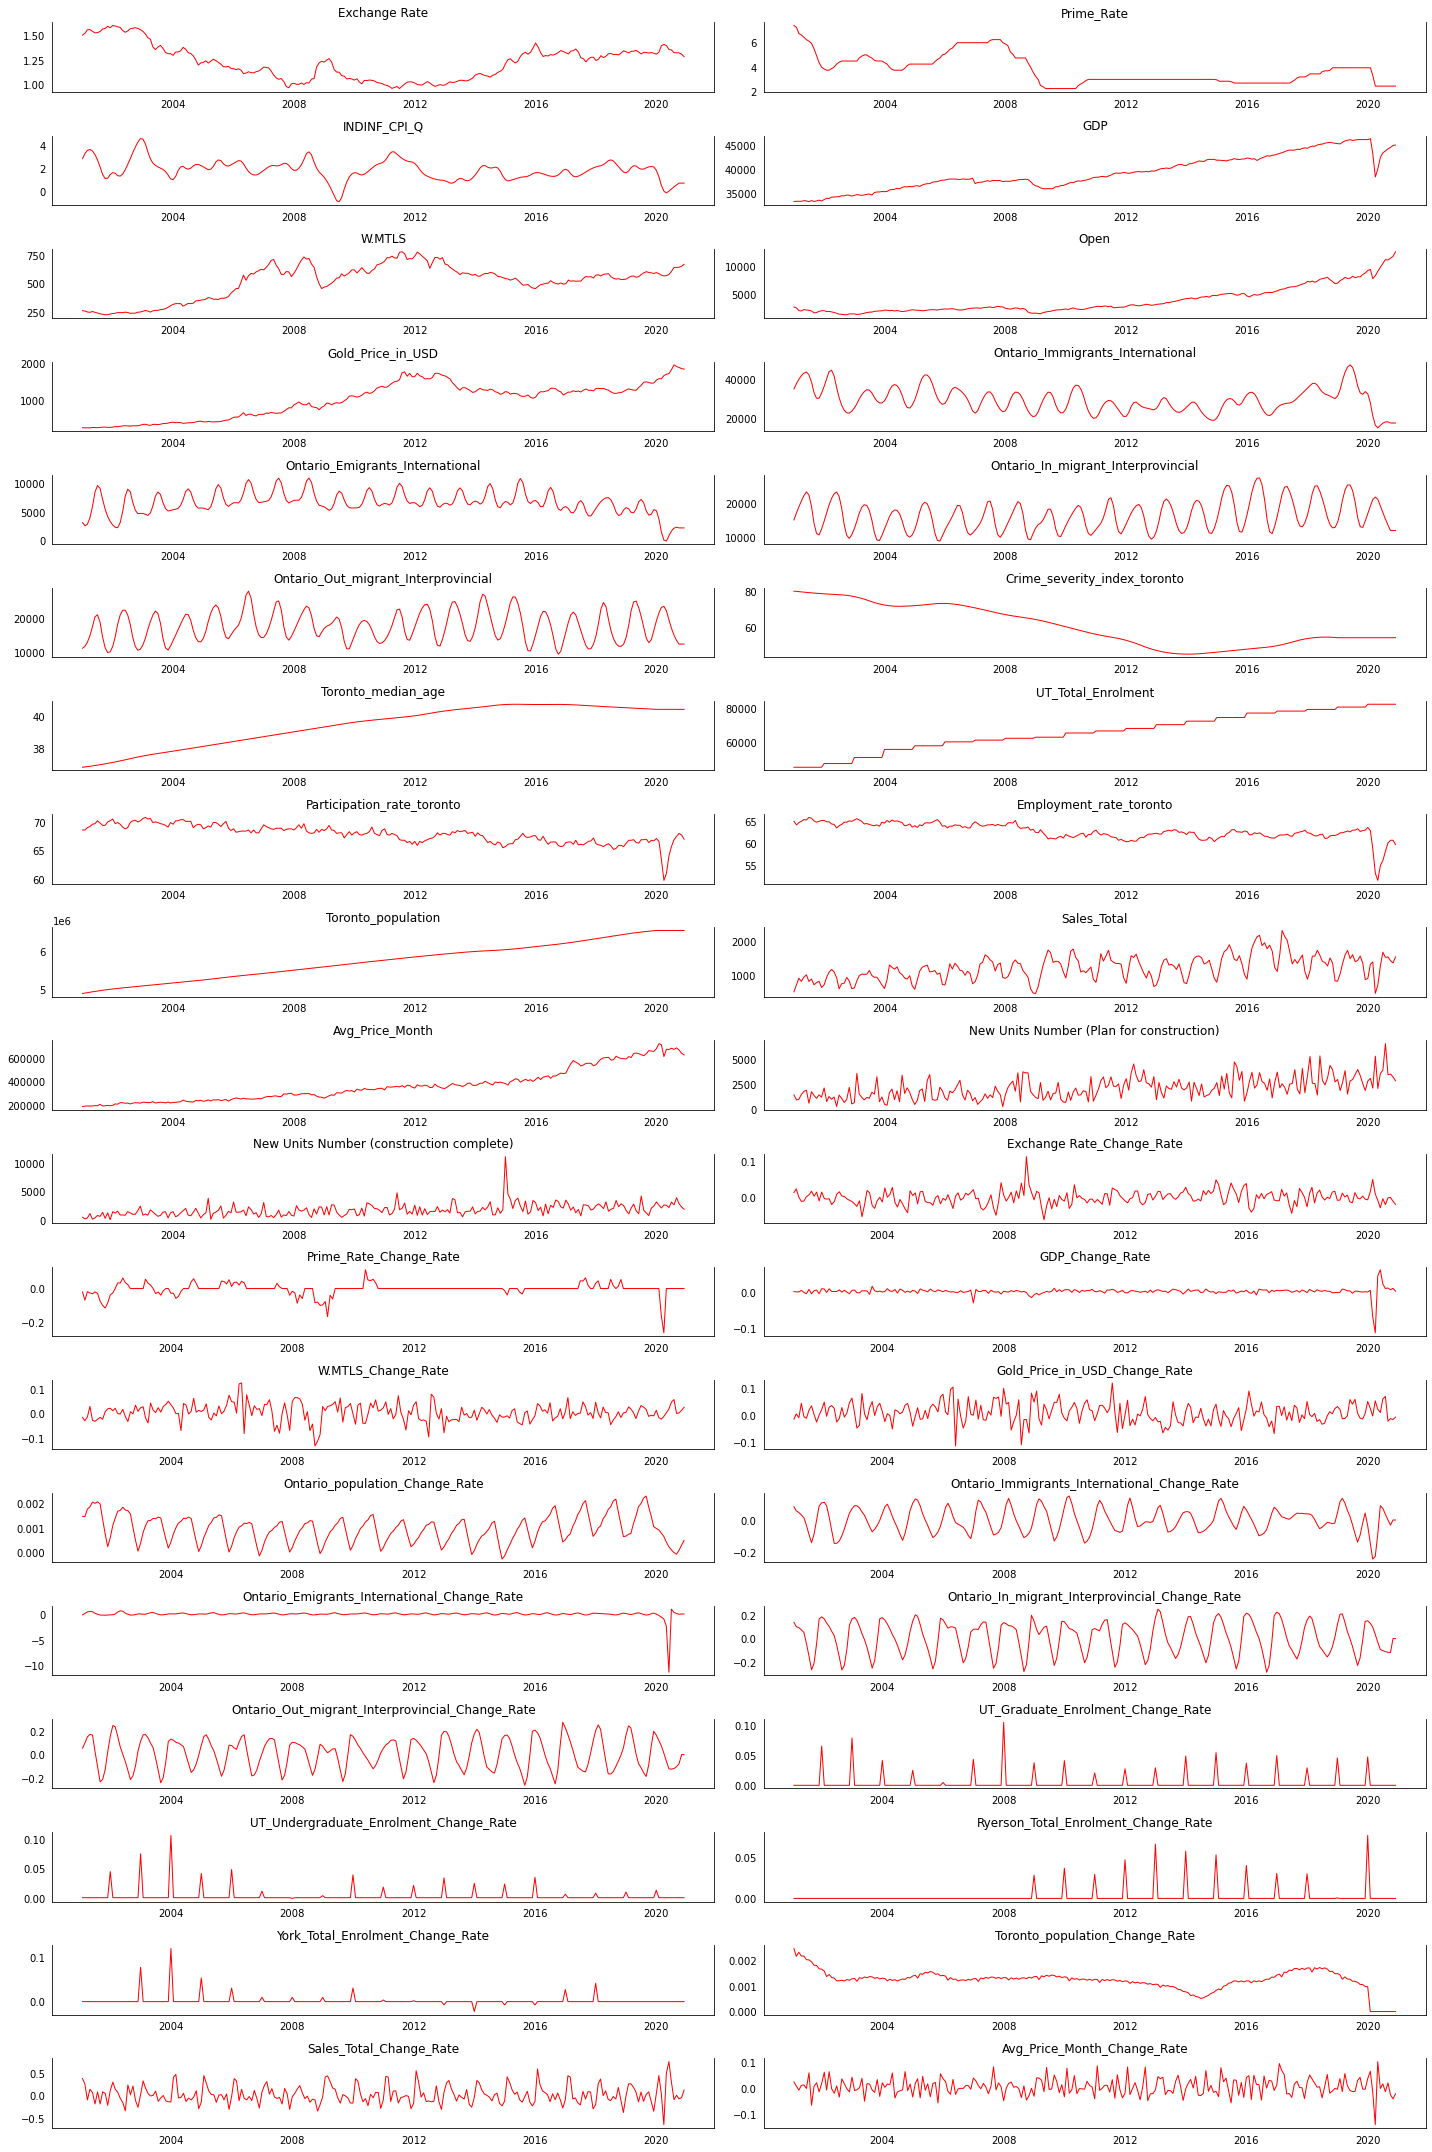

In [4]:
# Plot
fig, axes = plt.subplots(nrows=19, ncols=2, figsize=(20,30))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
for col in df.columns:
    if "Change_Rate" in col:
        df.drop(columns=[col], inplace=True)

In [6]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261,68.6,65.0,4882618.000,528,185757.6686,1457,511
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261,68.6,64.2,4894687.054,732,189990.7036,946,227
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261,69.0,64.7,4905287.460,925,191476.2205,1015,387
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261,69.2,65.0,4916690.735,836,189802.6914,1503,1151
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261,69.6,65.4,4927393.091,958,191658.3372,1810,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,1.323456,2.450,0.380368,43904.52149,641.6550,11188.406810,1966.617619,17844.25527,2164.615160,15412.26311,...,54.180000,40.400000,82311,66.9,58.2,6555205.000,1536,673173.9453,6618,2689
2020-09-01,1.321741,2.450,0.548652,44363.54588,642.2860,11119.767620,1922.101364,17850.99984,2346.044135,13622.70035,...,54.180000,40.400000,82311,67.5,60.1,6555205.000,1549,686191.4216,3490,3922
2020-10-01,1.321338,2.450,0.700000,44628.00813,644.0925,11455.091750,1897.330909,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311,68.0,60.7,6555205.000,1438,668160.6273,3550,2872


In [7]:
df["Date"] = df.index
df["Month"] = df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
df["Month"] = df["Month"].astype("float64")
df.drop(columns=["Date"], inplace=True)

In [8]:
df.columns

Index(['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

In [9]:
df.drop(columns=["Exchange Rate", "Gold_Price_in_USD", "Ontario_Emigrants_International", "Ontario_Emigrants_International", 
                 "Ontario_In_migrant_Interprovincial", 'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto'], inplace = True)

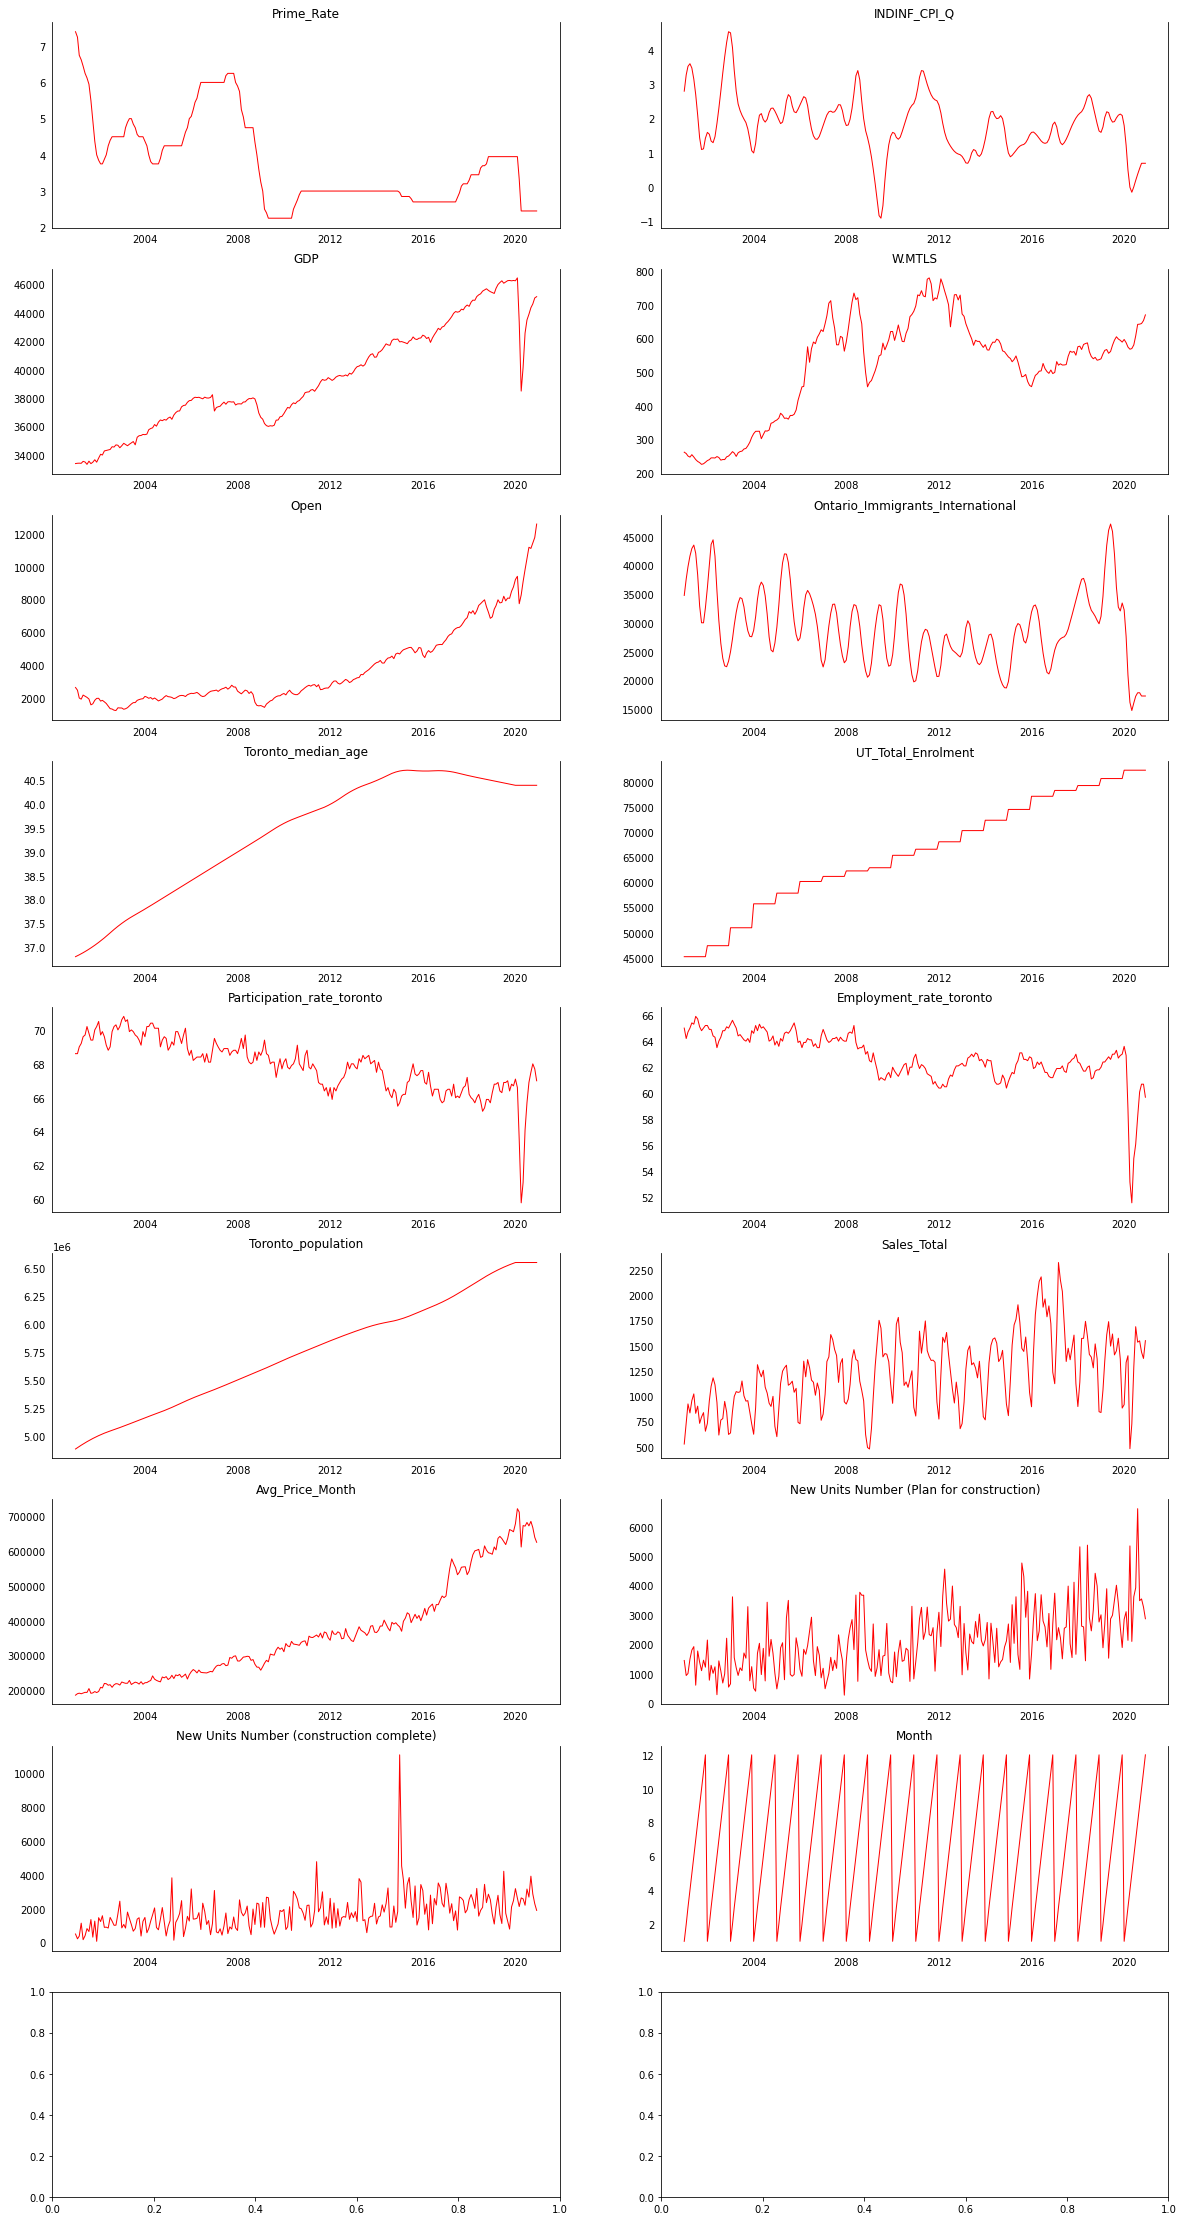

In [10]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
    
except:
    pass


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
df_target = pd.DataFrame()
df_target["Avg_Price_Month"] = df["Avg_Price_Month"]
df.drop(columns = ["Avg_Price_Month"], inplace=True)

In [13]:
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:5])

[[ 3.0185661   1.14651927 -1.6411796  -1.71363835 -0.47445131  0.88529165
  -2.12436066 -1.92170243  0.45061462  1.19603653 -1.7817056  -1.98243207
  -0.62422367 -1.16552164 -1.59325501]
 [ 2.8934078   1.70279558 -1.63549048 -1.73991673 -0.54354223  1.33389865
  -2.10795313 -1.92170243  0.45061462  0.76927754 -1.75684952 -1.40360943
  -1.0959019  -1.42767429 -1.30357228]
 [ 2.47621347  1.99470032 -1.63369039 -1.78972336 -0.74040384  1.66858442
  -2.09244055 -1.92170243  0.7055292   1.03600191 -1.73501811 -0.85599782
  -1.03221149 -1.27998265 -1.01388955]
 [ 2.37191489  2.08478453 -1.63621841 -1.81109292 -0.76929675  1.96106734
  -2.0744988  -1.92170243  0.83298648  1.19603653 -1.7115332  -1.10852338
  -0.5817634  -0.57475508 -0.72420682]
 [ 2.22589688  1.9387393  -1.59830781 -1.76296044 -0.66613316  2.16601062
  -2.05636826 -1.92170243  1.08790106  1.40941603 -1.68949182 -0.76236474
  -0.29838725 -1.47567407 -0.43452409]]


In [14]:
pca = PCA(n_components=8)

In [15]:
df_pca = pca.fit_transform(df_scaled)

In [16]:
df_pca_fit = pd.DataFrame(data = df_pca)
df_pca_fit.head()

,0,1,2,3,4,5,6,7
0,-5.365835,-1.110312,0.345955,1.711073,-0.147497,-1.948281,-0.534614,-0.133266
1,-5.399483,-1.399088,0.144226,1.168471,0.112103,-1.754495,-0.781545,0.585484
2,-5.446405,-1.722816,0.046336,0.702465,0.140688,-1.132673,-0.426176,0.844887
3,-5.380237,-1.901328,-0.053785,1.111363,-0.196265,-0.649818,0.055711,0.605852
4,-5.451284,-2.085302,-0.487691,0.246343,-0.201463,-1.047411,0.250310,0.538486


In [17]:
pca.explained_variance_ratio_

array([0.52217185, 0.10240107, 0.0731204 , 0.06105926, 0.05770105,
       0.04746321, 0.04121162, 0.03130094])

In [18]:
df_target["Avg_Price_Month"]

Date
2001-01-01    185757.6686
2001-02-01    189990.7036
2001-03-01    191476.2205
2001-04-01    189802.6914
2001-05-01    191658.3372
                 ...     
2020-08-01    673173.9453
2020-09-01    686191.4216
2020-10-01    668160.6273
2020-11-01    640207.7862
2020-12-01    625828.1154
Name: Avg_Price_Month, Length: 240, dtype: float64

In [19]:
df_pca_fit.index = df_target.index

In [20]:
df_pca_fit["Avg_Price_Month"] = df_target["Avg_Price_Month"]

In [21]:
df_pca_fit

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.365835,-1.110312,0.345955,1.711073,-0.147497,-1.948281,-0.534614,-0.133266,185757.6686
2001-02-01,-5.399483,-1.399088,0.144226,1.168471,0.112103,-1.754495,-0.781545,0.585484,189990.7036
2001-03-01,-5.446405,-1.722816,0.046336,0.702465,0.140688,-1.132673,-0.426176,0.844887,191476.2205
2001-04-01,-5.380237,-1.901328,-0.053785,1.111363,-0.196265,-0.649818,0.055711,0.605852,189802.6914
2001-05-01,-5.451284,-2.085302,-0.487691,0.246343,-0.201463,-1.047411,0.250310,0.538486,191658.3372
...,...,...,...,...,...,...,...,...,...
2020-08-01,5.755095,0.502905,-0.808065,0.599607,-1.368677,-1.447494,2.535123,-0.808065,673173.9453
2020-09-01,4.945938,0.679100,-0.370738,0.646945,-1.364613,0.711938,0.257081,-0.662265,686191.4216
2020-10-01,4.583156,0.691024,-1.038158,0.339907,-1.288984,0.210495,0.118715,-0.682047,668160.6273


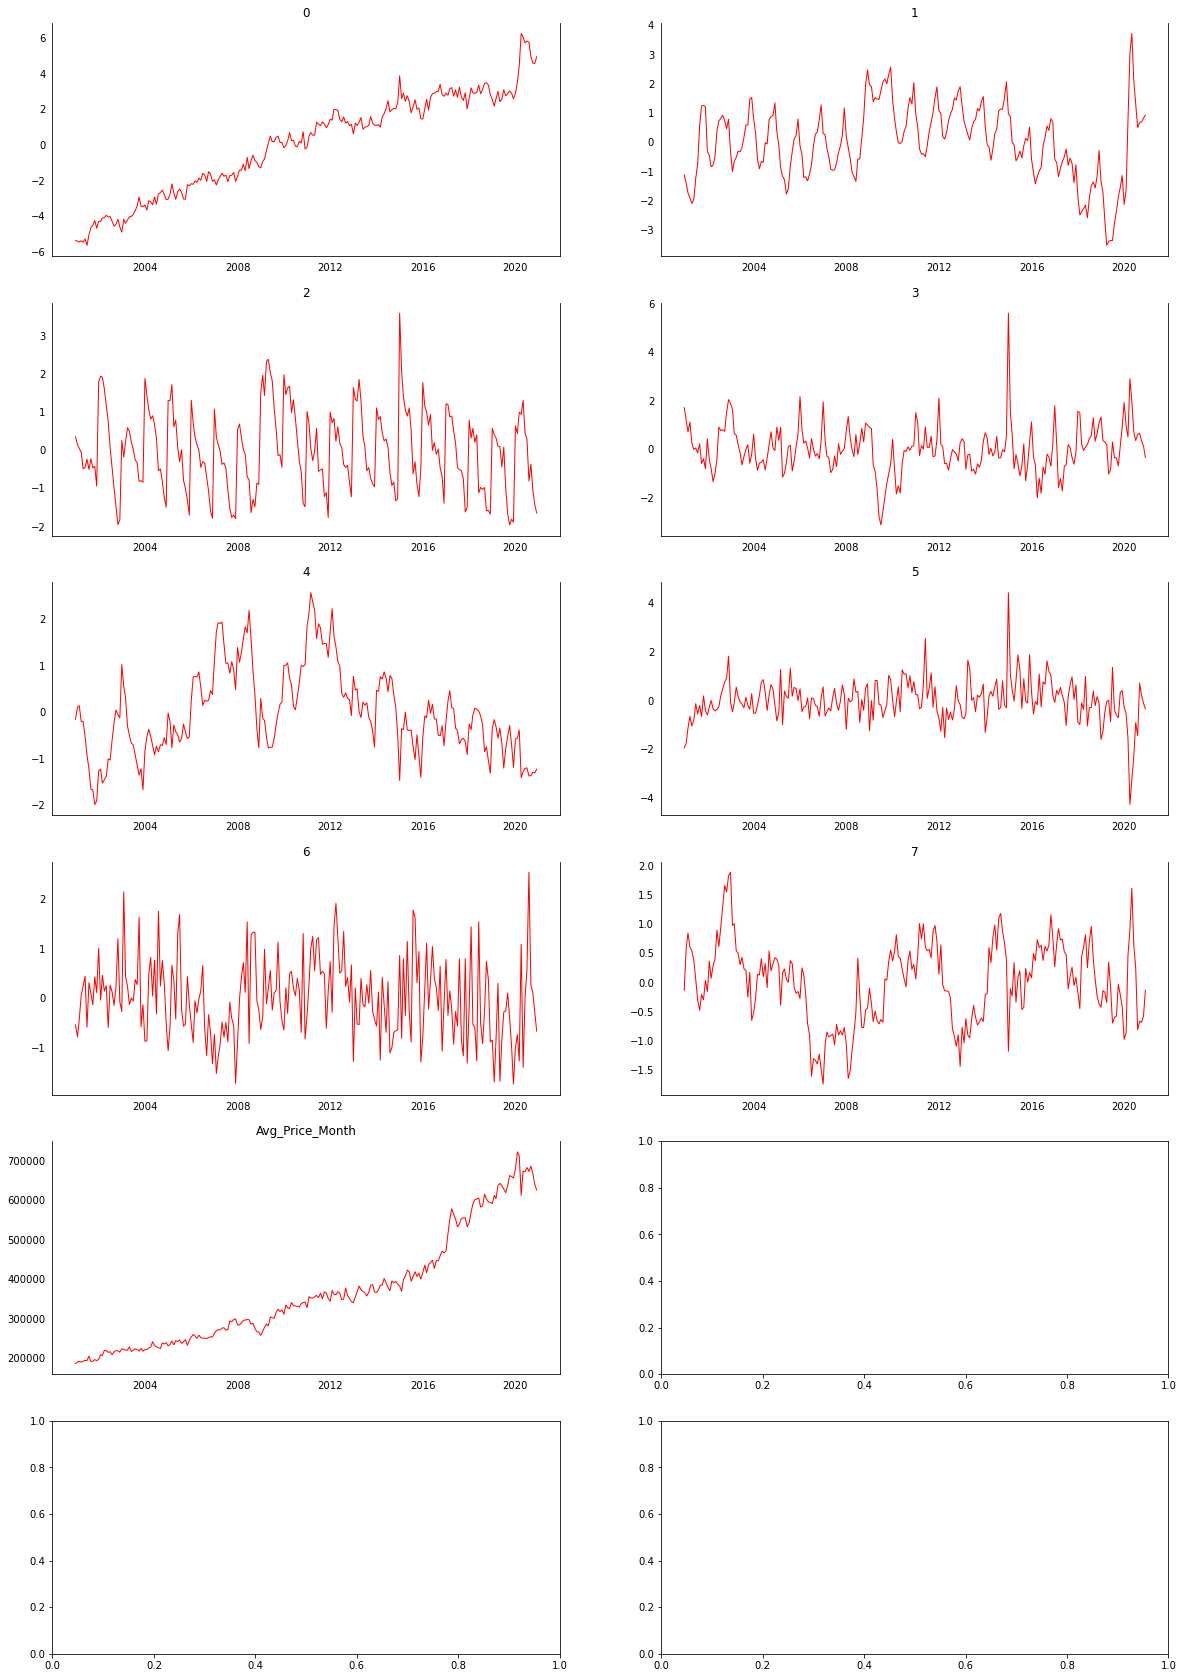

In [22]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df_pca_fit[df_pca_fit.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df_pca_fit.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [23]:
df = df_pca_fit.copy()

In [24]:
df["Avg_Price_Month"] = df["Avg_Price_Month"]/100000

In [25]:
df

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.365835,-1.110312,0.345955,1.711073,-0.147497,-1.948281,-0.534614,-0.133266,1.857577
2001-02-01,-5.399483,-1.399088,0.144226,1.168471,0.112103,-1.754495,-0.781545,0.585484,1.899907
2001-03-01,-5.446405,-1.722816,0.046336,0.702465,0.140688,-1.132673,-0.426176,0.844887,1.914762
2001-04-01,-5.380237,-1.901328,-0.053785,1.111363,-0.196265,-0.649818,0.055711,0.605852,1.898027
2001-05-01,-5.451284,-2.085302,-0.487691,0.246343,-0.201463,-1.047411,0.250310,0.538486,1.916583
...,...,...,...,...,...,...,...,...,...
2020-08-01,5.755095,0.502905,-0.808065,0.599607,-1.368677,-1.447494,2.535123,-0.808065,6.731739
2020-09-01,4.945938,0.679100,-0.370738,0.646945,-1.364613,0.711938,0.257081,-0.662265,6.861914
2020-10-01,4.583156,0.691024,-1.038158,0.339907,-1.288984,0.210495,0.118715,-0.682047,6.681606


In [26]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,Avg_Price_Month_x
0_y,1.0000,0.0001,0.0025,0.0036,0.0113,0.0007,0.0000,0.0000,0.0089
1_y,0.0000,1.0000,0.0000,0.0000,0.0167,0.2299,0.0000,0.0002,0.0003
2_y,0.0210,0.0000,1.0000,0.0000,0.0000,0.0001,0.0389,0.0433,0.0180
3_y,0.0000,0.0000,0.0000,1.0000,0.0096,0.0028,0.0006,0.0011,0.0017
4_y,0.2791,0.0011,0.0000,0.0000,1.0000,0.0000,0.2994,0.0013,0.0008
5_y,0.1594,0.0000,0.0005,0.0002,0.1292,1.0000,0.0005,0.1772,0.0018
6_y,0.0461,0.0013,0.0006,0.0003,0.0085,0.6372,1.0000,0.0000,0.0660
7_y,0.0000,0.1546,0.0064,0.0000,0.0102,0.0227,0.0000,1.0000,0.2616
Avg_Price_Month_y,0.1694,0.0000,0.0001,0.0085,0.0017,0.0018,0.0835,0.5132,1.0000


In [27]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
0      ::  306.81    > 179.5199  =>   True
1      ::  219.82    > 143.6691  =>   True
2      ::  154.02    > 111.7797  =>   True
3      ::  102.01    > 83.9383   =>   True
4      ::  70.19     > 60.0627   =>   True
5      ::  43.26     > 40.1749   =>   True
6      ::  18.55     > 24.2761   =>   False
7      ::  4.7       > 12.3212   =>   False
Avg_Price_Month ::  0.08      > 4.1296    =>   False


In [28]:
nobs = 25
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(215, 9)
(25, 9)


In [29]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [30]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.282
 No. Lags Chosen       = 2
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.6374. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6159
 No. Lags Chosen       = 15
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.4749. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-S

In [31]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [32]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.9952
 No. Lags Chosen       = 1
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4798
 No. Lags Chosen       = 14
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [33]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [34]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4278
 No. Lags Chosen       = 15
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6794
 No. Lags Chosen       = 15
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test S

In [35]:
df_differenced

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-03-01,-0.013274,-0.034953,0.103840,0.076596,-0.231014,0.428036,0.602300,-0.459348,-0.027475
2001-04-01,0.113090,0.145216,-0.002233,0.874903,-0.365538,-0.138966,0.126518,-0.498438,-0.031590
2001-05-01,-0.137214,-0.005462,-0.333784,-1.273917,0.331755,-0.880449,-0.287288,0.171670,0.035292
2001-06-01,0.251377,0.327593,0.462951,0.599332,-0.316485,0.637660,-0.003494,-0.094682,0.003864
2001-07-01,-0.544770,0.560788,0.193153,0.329828,-0.073415,0.435252,-1.216139,-0.153270,-0.026289
...,...,...,...,...,...,...,...,...,...
2018-07-01,-0.894118,1.091342,1.665810,0.150136,-0.066897,2.765534,-4.837460,1.005103,-0.254301
2018-08-01,0.735756,-0.237095,-0.200574,-0.142075,-0.084221,-0.726273,1.624976,-0.179568,0.257905
2018-09-01,0.084174,-0.301050,0.108628,0.640303,-0.393105,0.665255,1.071749,-0.822692,0.274179


In [36]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -18.757400073638056
BIC :  -17.33243420231503
FPE :  7.145596692379291e-09
HQIC:  -18.18146215400023 

Lag Order = 2
AIC :  -20.26893310845734
BIC :  -17.552498317820337
FPE :  1.5820715248392045e-09
HQIC:  -19.1708962135541 

Lag Order = 3
AIC :  -20.801106185033
BIC :  -16.784577148172033
FPE :  9.385074650661925e-10
HQIC:  -19.17737234605505 

Lag Order = 4
AIC :  -21.17280353899858
BIC :  -15.847457577734069
FPE :  6.599395488583608e-10
HQIC:  -19.019734892704324 

Lag Order = 5
AIC :  -21.50714105883788
BIC :  -14.864156611740064
FPE :  4.882132081552762e-10
HQIC:  -18.82105924787231 

Lag Order = 6
AIC :  -21.73577091448945
BIC :  -13.766225974072263
FPE :  4.086329629431282e-10
HQIC:  -18.5129564765031 

Lag Order = 7
AIC :  -22.04212751135288
BIC :  -12.736998029688806
FPE :  3.2376395212143656e-10
HQIC:  -18.278819256676336 



C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
x = model.select_order(maxlags=17)
x.summary()

,AIC,BIC,FPE,HQIC
0,-15.93,-15.78,1.211e-07,-15.87
1,-18.77,-17.27,7.049e-09,-18.16
2,-20.33,-17.47*,1.486e-09,-19.17
3,-20.87,-16.66,8.752e-10,-19.17
4,-21.25,-15.68,6.151e-10,-19.00
5,-21.63,-14.71,4.359e-10,-18.83
6,-21.84,-13.56,3.758e-10,-18.49
7,-22.24,-12.61,2.739e-10,-18.34
8,-22.30,-11.31,2.909e-10,-17.85
9,-22.57,-10.22,2.593e-10,-17.57


In [38]:
# 14
# 15
# 17
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Jun, 2021
Time:                     19:34:41
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -10.4182
Nobs:                     198.000    HQIC:                  -22.5178
Log likelihood:           1739.28    FPE:                7.24499e-13
AIC:                     -30.7457    Det(Omega_mle):     6.55098e-15
--------------------------------------------------------------------
Results for equation 0
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.001006         0.022550            0.045           0.964
L1.0                       -0.675833         0.528731           -1.278           0.201
L1.1                        1.391948    

In [39]:
def adjust(val, length= 6): return str(val).ljust(length)

In [40]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

0      : 1.98
1      : 1.9
2      : 2.01
3      : 2.0
4      : 2.05
5      : 1.95
6      : 2.1
7      : 2.0
Avg_Price_Month : 1.99


In [41]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

15


array([[-1.14167885e+00,  7.98200087e-01,  2.88621524e-02,
        -9.68122729e-01,  3.84203693e-01, -6.45621544e-01,
        -2.98672811e+00,  8.06150133e-01,  6.23341850e-02],
       [ 3.87030137e-01, -4.18104666e-01, -1.86995584e-01,
        -2.68378348e-01, -6.52553337e-02, -2.21824742e-01,
         1.31104426e+00, -7.16454811e-02, -1.29651614e-01],
       [ 6.01747628e-01, -4.88824383e-01, -6.64171074e-01,
         1.25734240e-01, -1.04576038e-01, -1.22563378e+00,
         2.27822353e+00, -4.61354055e-01, -5.43377800e-03],
       [-1.32044834e+00,  1.27807284e+00,  9.97267407e-01,
         7.50241576e-01, -2.02815083e-01,  1.51886109e+00,
        -4.06112161e+00,  4.48551398e-01, -2.30870651e-01],
       [ 1.49071721e+00, -1.70305965e+00,  2.16420017e+00,
         1.24475838e+00,  9.35194386e-01, -2.11910960e+00,
         3.20951478e+00, -3.95880065e-01,  3.32737600e-01],
       [-6.95346078e-03,  4.63054117e-01, -2.75562922e+00,
        -1.78251180e+00, -7.75696629e-01,  1.421225

In [42]:
col_list = list()
for col in df.columns:
    col_list.append(str(col))
df.columns = col_list 

In [43]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d
Date,,,,,,,,,
2018-12-01,-0.061472,0.176603,-0.725273,0.020490,-0.165103,-2.116174,0.440166,0.049243,-0.148605
2019-01-01,0.516898,-1.564717,4.175577,1.956578,0.469655,2.920834,-0.121901,-0.425383,0.415428
2019-02-01,-0.465981,0.454281,-3.411111,-3.872050,0.525323,-0.299327,-0.944472,0.819525,-0.053649
2019-03-01,0.821578,-0.475605,-0.900961,0.395508,-0.242890,-2.033398,3.135112,-0.050324,0.211561
2019-04-01,-1.256145,1.230698,0.636064,0.029697,0.245730,1.059117,-3.715515,0.596970,-0.156605
2019-05-01,0.795638,-0.110591,-0.090504,1.444754,-0.799808,0.032863,1.923000,-0.456242,-0.135794
2019-06-01,0.063938,0.205857,0.010854,0.530988,-0.100894,0.236075,0.095310,-0.415833,-0.201287
2019-07-01,-0.178602,-0.055120,0.020283,-0.509146,0.202274,-0.027777,-0.419223,0.032858,-0.044937
2019-08-01,-0.372622,-0.216897,-0.793972,-0.968852,0.418627,-1.511238,0.623076,-0.287301,0.320082


In [44]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [45]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d,0_1d,...,4_1d,4_forecast,5_1d,5_forecast,6_1d,6_forecast,7_1d,7_forecast,Avg_Price_Month_1d,Avg_Price_Month_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,-0.061472,0.176603,-0.725273,0.020490,-0.165103,-2.116174,0.440166,0.049243,-0.148605,-0.195422,...,-0.464061,-1.507169,-1.752250,-1.594742,0.067958,0.433653,-0.242321,-0.480663,-0.223364,5.733411
2019-01-01,0.516898,-1.564717,4.175577,1.956578,0.469655,2.920834,-0.121901,-0.425383,0.415428,0.321476,...,0.005594,-1.501575,1.168583,-0.426159,-0.053943,0.379710,-0.667704,-1.148367,0.192065,5.925476
2019-02-01,-0.465981,0.454281,-3.411111,-3.872050,0.525323,-0.299327,-0.944472,0.819525,-0.053649,-0.144506,...,0.530917,-0.970658,0.869256,0.443097,-0.998416,-0.618706,0.151821,-0.996546,0.138415,6.063891
2019-03-01,0.821578,-0.475605,-0.900961,0.395508,-0.242890,-2.033398,3.135112,-0.050324,0.211561,0.677073,...,0.288027,-0.682630,-1.164142,-0.721045,2.136696,1.517990,0.101497,-0.895049,0.349977,6.413868
2019-04-01,-1.256145,1.230698,0.636064,0.029697,0.245730,1.059117,-3.715515,0.596970,-0.156605,-0.579072,...,0.533758,-0.148873,-0.105025,-0.826070,-1.578818,-0.060828,0.698467,-0.196581,0.193371,6.607239
2019-05-01,0.795638,-0.110591,-0.090504,1.444754,-0.799808,0.032863,1.923000,-0.456242,-0.135794,0.216566,...,-0.266050,-0.414923,-0.072162,-0.898232,0.344182,0.283353,0.242225,0.045643,0.057577,6.664816
2019-06-01,0.063938,0.205857,0.010854,0.530988,-0.100894,0.236075,0.095310,-0.415833,-0.201287,0.280503,...,-0.366944,-0.781867,0.163912,-0.734320,0.439491,0.722844,-0.173608,-0.127965,-0.143709,6.521107
2019-07-01,-0.178602,-0.055120,0.020283,-0.509146,0.202274,-0.027777,-0.419223,0.032858,-0.044937,0.101901,...,-0.164670,-0.946537,0.136136,-0.598184,0.020269,0.743113,-0.140750,-0.268715,-0.188647,6.332460
2019-08-01,-0.372622,-0.216897,-0.793972,-0.968852,0.418627,-1.511238,0.623076,-0.287301,0.320082,-0.270721,...,0.253957,-0.692579,-1.375102,-1.973286,0.643345,1.386458,-0.428051,-0.696765,0.131435,6.463895


In [46]:
col_list = list()
for col in df_test.columns:
    col_list.append(str(col))
df_test.columns = col_list 

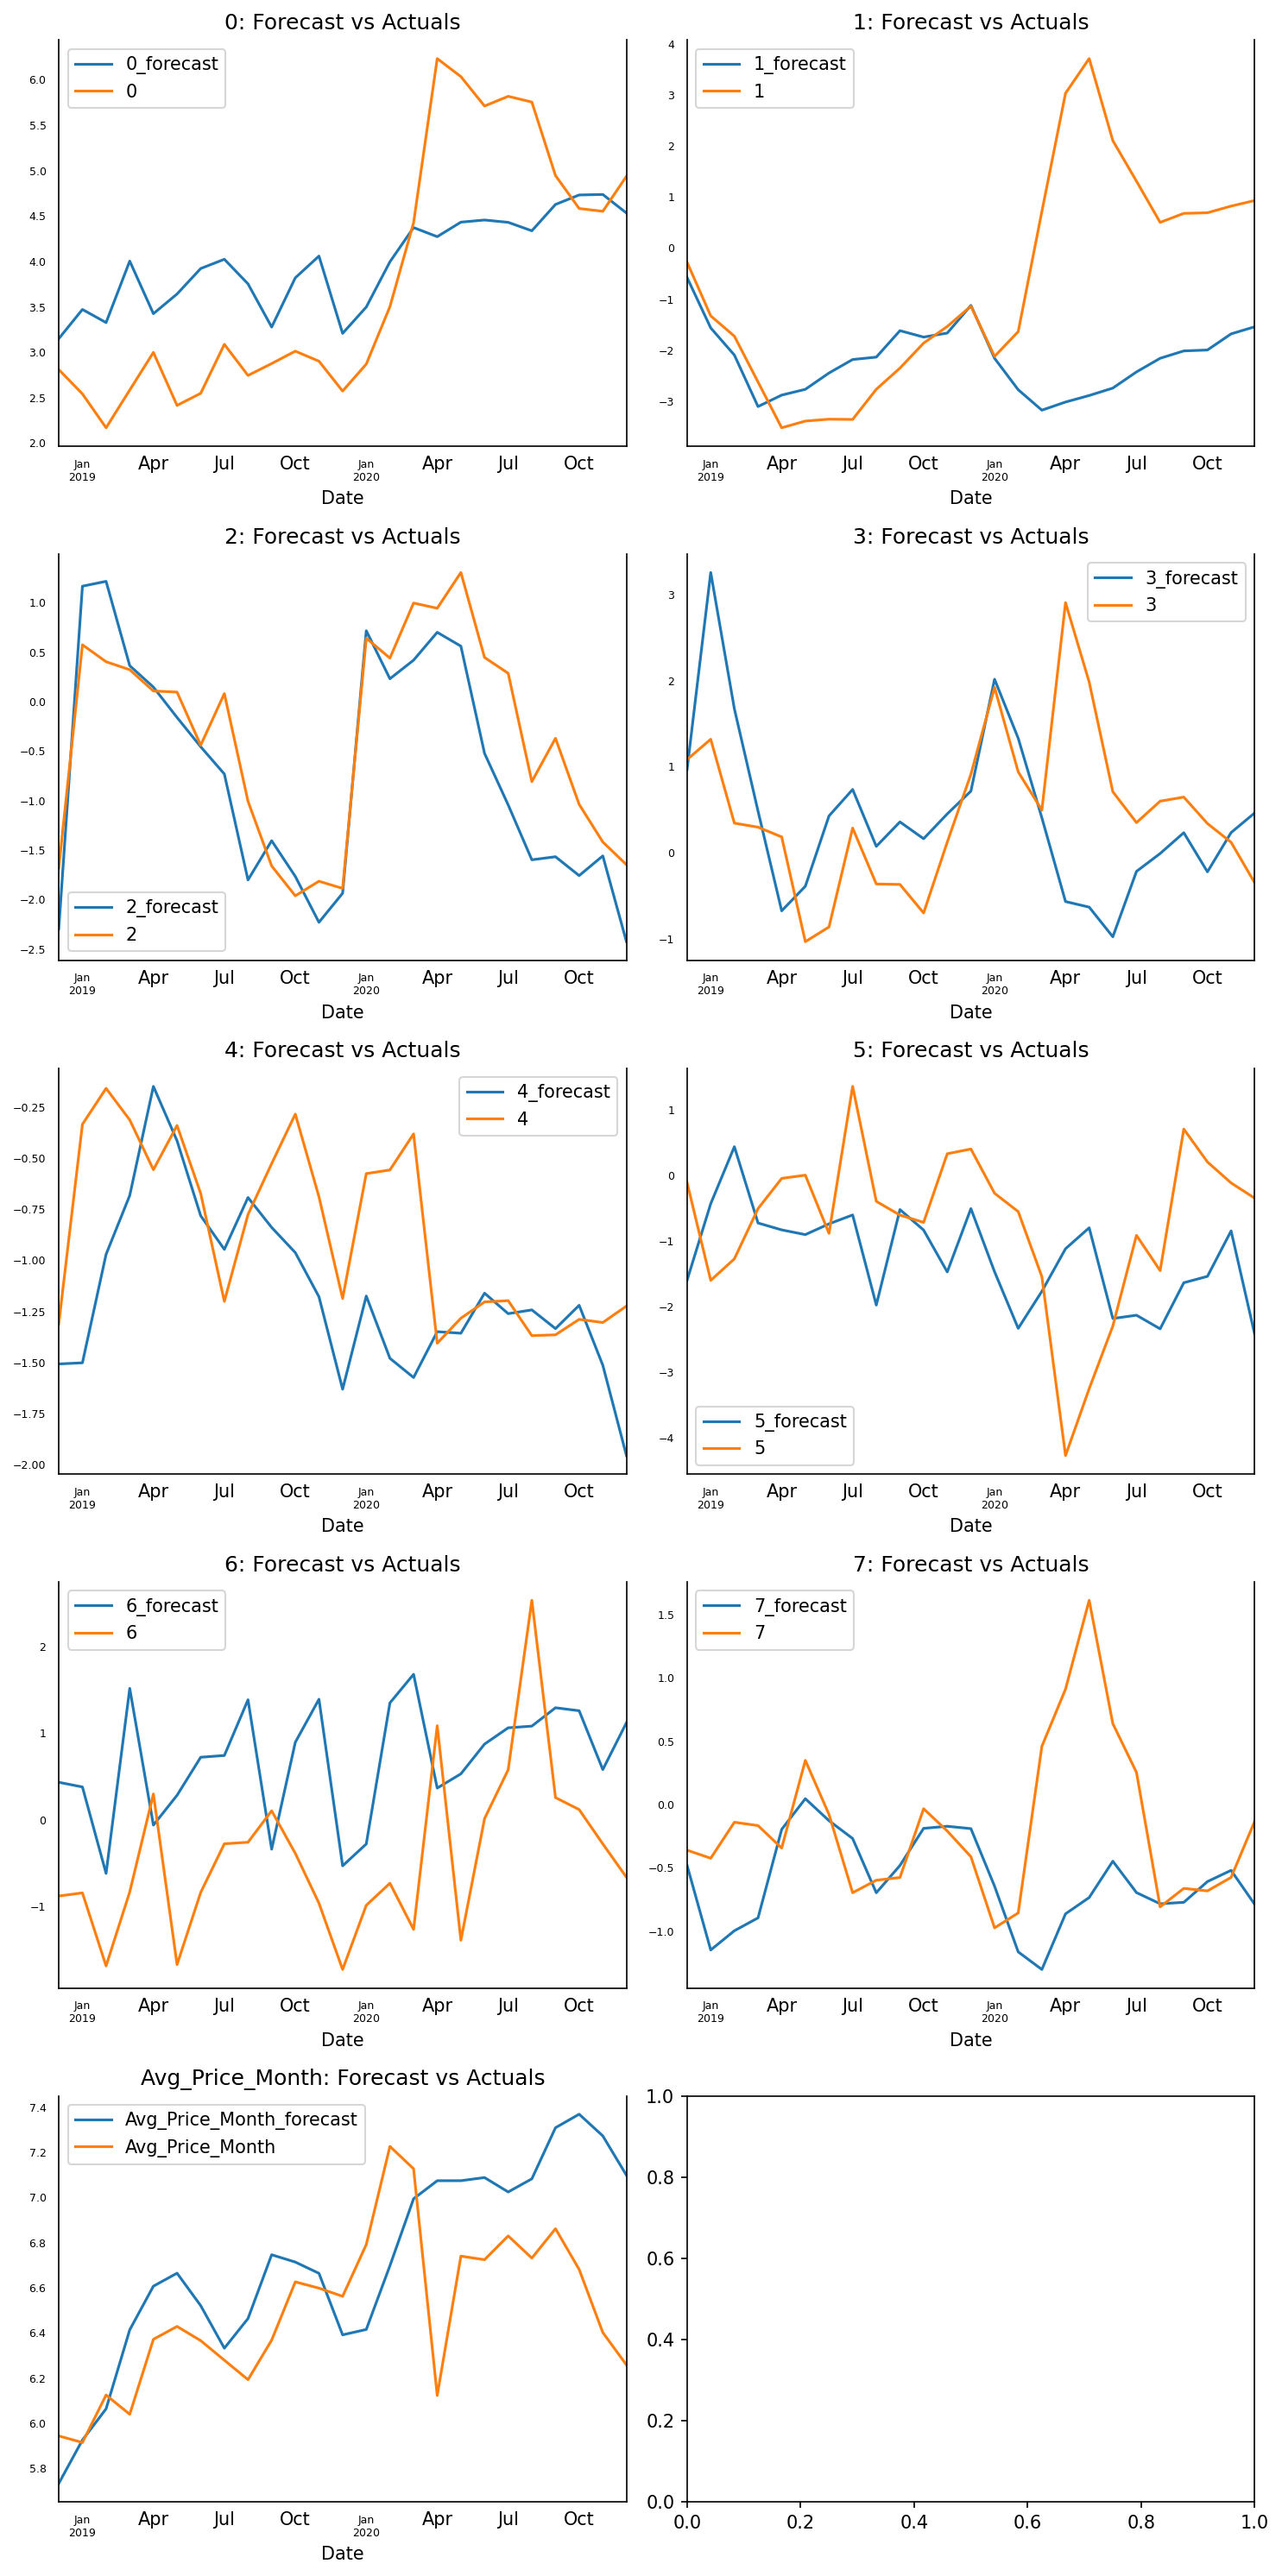

In [47]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,20))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [48]:
df_results['Avg_Price_Month_forecast']

Date
2018-12-01    5.733411
2019-01-01    5.925476
2019-02-01    6.063891
2019-03-01    6.413868
2019-04-01    6.607239
2019-05-01    6.664816
2019-06-01    6.521107
2019-07-01    6.332460
2019-08-01    6.463895
2019-09-01    6.746496
2019-10-01    6.714072
2019-11-01    6.664199
2019-12-01    6.391583
2020-01-01    6.415435
2020-02-01    6.697902
2020-03-01    6.994604
2020-04-01    7.074526
2020-05-01    7.074697
2020-06-01    7.088568
2020-07-01    7.024713
2020-08-01    7.082912
2020-09-01    7.309355
2020-10-01    7.369242
2020-11-01    7.273093
2020-12-01    7.098781
Name: Avg_Price_Month_forecast, dtype: float64

In [49]:
df_test.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', 'Avg_Price_Month'], dtype='object')

In [50]:
df_final = df_results[['Avg_Price_Month_forecast']].join(df_test[["Avg_Price_Month"]])

In [51]:
df_final

,Avg_Price_Month_forecast,Avg_Price_Month
Date,,
2018-12-01,5.733411,5.943815
2019-01-01,5.925476,5.914439
2019-02-01,6.063891,6.124885
2019-03-01,6.413868,6.039691
2019-04-01,6.607239,6.371804
2019-05-01,6.664816,6.428907
2019-06-01,6.521107,6.366065
2019-07-01,6.332460,6.279269
2019-08-01,6.463895,6.193065


In [52]:
df_test["Avg_Price_Month"]

Date
2018-12-01    5.943815
2019-01-01    5.914439
2019-02-01    6.124885
2019-03-01    6.039691
2019-04-01    6.371804
2019-05-01    6.428907
2019-06-01    6.366065
2019-07-01    6.279269
2019-08-01    6.193065
2019-09-01    6.368175
2019-10-01    6.626311
2019-11-01    6.598553
2019-12-01    6.562325
2020-01-01    6.791822
2020-02-01    7.226747
2020-03-01    7.127458
2020-04-01    6.123005
2020-05-01    6.740281
2020-06-01    6.724651
2020-07-01    6.829996
2020-08-01    6.731739
2020-09-01    6.861914
2020-10-01    6.681606
2020-11-01    6.402078
2020-12-01    6.258281
Name: Avg_Price_Month, dtype: float64